In [ ]:
#---------------------------------------------------------------Import_Libraries---------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
#------------------------------------------------------------------Read_Data-------------------------------------------------------------------
path = '/content/iris.data' # path of the dataset
Data = pd.read_csv(path, header = None) # Read CSV Data File

In [ ]:
#---------------------------------------------------------------Train Test Split---------------------------------------------------------------
[X1_Train , X1_Test , Y1_Train , Y1_Test] = train_test_split( Data.iloc[0:50,0:4] , Data.iloc[0:50,4] , test_size = 0.3) # Split Data into class 1
[X2_Train , X2_Test , Y2_Train , Y2_Test] = train_test_split( Data.iloc[50:100,0:4] , Data.iloc[50:100,4] , test_size = 0.3) # Split Data into class 2
[X3_Train , X3_Test , Y3_Train , Y3_Test] = train_test_split( Data.iloc[100:150,0:4] , Data.iloc[100:150,4] , test_size = 0.3) # Split Data into class 3

X_Train = pd.concat([X1_Train , X2_Train , X3_Train]) # Merge Input Training Data
X_Test  = pd.concat([X1_Test  , X2_Test  , X3_Test]) # Merge Input Test Data
Y_Train = pd.concat([Y1_Train , Y2_Train , Y3_Train]) # Merge Output Training Data
Y_Test  = pd.concat([Y1_Test  , Y2_Test  , Y3_Test]) # Merge Output Test Data


In [ ]:
#-------------------------------------------------------Model Definition & Prediction----------------------------------------------------------

#-------------------------------------------------------------------Part A---------------------------------------------------------------------
clf = svm.SVC(kernel='linear') # Define Model
clf.fit(X_Train, Y_Train) # Fit the Model
Test_Predict = clf.predict(X_Test) # Prediction
Train_Predict  = clf.predict(X_Train) # Prediction

# Test
Correct = 0
Wrong   = 0
for i in range(X_Test.shape[0]) : # 
    if Test_Predict[i] == Y_Test.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Test_Part_A = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Test Data in Part A is : %s \n" % round(Accuracy_on_Test_Part_A,2))
Conf_Mat_on_Test = 100 * confusion_matrix(Y_Test.values , Test_Predict)/X_Test.shape[0] # Confussion Matrix
print("Confusion Matrix on Test Data in Part A is : \n\n %s " % Conf_Mat_on_Test.round(2))
Number_of_Support_Vecs = clf.n_support_ # Number of Support Vectors
print("\nNumber of Support Vectors in Part A in each Class is : %s \n\n\n\n\n" % Number_of_Support_Vecs)

# Train
Correct = 0
Wrong   = 0
for i in range(X_Train.shape[0]) :
    if Train_Predict[i] == Y_Train.iloc[i]: # Calculate the correct & wrong estimations
       Correct += 1
    else:
       Wrong += 1
Accuracy_on_Train_Part_A = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Train Data in Part A is : %s \n" % round(Accuracy_on_Train_Part_A,2))
Conf_Mat_on_Train = 100 * confusion_matrix(Y_Train.values , Train_Predict)/X_Train.shape[0] # Confussion Matrix
print("Confusion Matrix on Train Data in Part A is : \n\n %s \n\n\n\n" % Conf_Mat_on_Train.round(2))


Accuracy on Test Data in Part A is : 100.0 

Confusion Matrix on Test Data in Part A is : 

 [[33.33  0.    0.  ]
 [ 0.   33.33  0.  ]
 [ 0.    0.   33.33]] 

Number of Support Vectors in Part A in each Class is : [ 2 11 10] 





Accuracy on Train Data in Part A is : 98.1 

Confusion Matrix on Train Data in Part A is : 

 [[33.33  0.    0.  ]
 [ 0.   31.43  1.9 ]
 [ 0.    0.   33.33]] 






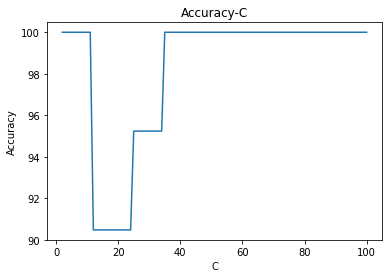

Accuracy on Test Data in Part B is : 97.78 

Confusion Matrix on Test Data in Part B is : 

 [[33.33  0.    0.  ]
 [ 0.   33.33  0.  ]
 [ 0.    2.22 31.11]] 

Number of Support Vectors in Part B in each Class is : [2 7 6] 





Accuracy on Train Data in Part B is : 97.62 

Confusion Matrix on Train Data in Part B is : 

 [[33.33  0.    0.  ]
 [ 0.   30.95  2.38]
 [ 0.    0.   33.33]] 



In [ ]:
#-------------------------------------------------------------------Part B---------------------------------------------------------------------
[X1_Train , X1_Valid , Y1_Train , Y1_Valid] = train_test_split( X_Train.iloc[0:35,:] , Y_Train.iloc[0:35] , test_size = 0.2) # Split Data into class 1
[X2_Train , X2_Valid , Y2_Train , Y2_Valid] = train_test_split( X_Train.iloc[35:70,:] , Y_Train.iloc[35:70] , test_size = 0.2) # Split Data into class 2
[X3_Train , X3_Valid , Y3_Train , Y3_Valid] = train_test_split( X_Train.iloc[70:105,:] , Y_Train.iloc[70:105] , test_size = 0.2) # Split Data into class 3

X_Train = pd.concat([X1_Train , X2_Train , X3_Train]) # Merge Input Training Data
X_Valid  = pd.concat([X1_Valid  , X2_Valid  , X3_Valid]) # Merge Input Test Data
Y_Train = pd.concat([Y1_Train , Y2_Train , Y3_Train]) # Merge Output Training Data
Y_Valid  = pd.concat([Y1_Valid  , Y2_Valid  , Y3_Valid]) # Merge Output Test Data

Accuracy_on_Valid = []

for i in range(99) : # Find the Best C
    C = i + 2
    clf = svm.SVC(C = C , kernel='linear') # Define Model
    clf.fit(X_Train, Y_Train)  # Fit the Model
    Valid_Predict = clf.predict(X_Valid) # Prediction

    Correct = 0
    Wrong   = 0
    for i in range(X_Valid.shape[0]) :
        if Valid_Predict[i] == Y_Valid.iloc[i]: # Calculate the correct & wrong estimations
            Correct += 1
        else :
            Wrong += 1
    Accuracy_on_Valid.append(100 * Correct/(Correct + Wrong)) # Accuracy

n = range(99) + 2*np.ones(99)
plt.plot(n , Accuracy_on_Valid) ; plt.title("Accuracy-C") ; plt.ylabel("Accuracy") ; plt.xlabel("C") ; plt.show() # Plot Accuracy according to C

Best_C = Accuracy_on_Valid.index(max(Accuracy_on_Valid)) + 2

clf = svm.SVC(C = Best_C , kernel='linear') # Define Model
clf.fit(X_Train, Y_Train)  # Fit the Model
Test_Predict = clf.predict(X_Test) # Prediction
Train_Predict  = clf.predict(X_Train) # Prediction

# Test
Correct = 0
Wrong   = 0
for i in range(X_Test.shape[0]) :
    if Test_Predict[i] == Y_Test.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Test_Part_B = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Test Data in Part B is : %s \n" % round(Accuracy_on_Test_Part_B,2))
Conf_Mat_on_Test = 100 * confusion_matrix(Y_Test.values , Test_Predict)/X_Test.shape[0] # Confussion Matrix
print("Confusion Matrix on Test Data in Part B is : \n\n %s " % Conf_Mat_on_Test.round(2))
Number_of_Support_Vecs = clf.n_support_ # Number of Support Vectors
print("\nNumber of Support Vectors in Part B in each Class is : %s \n\n\n\n\n" % Number_of_Support_Vecs)

# Train
Correct = 0
Wrong   = 0
for i in range(X_Train.shape[0]) :
    if Train_Predict[i] == Y_Train.iloc[i]: # Calculate the correct & wrong estimations
       Correct += 1
    else:
       Wrong += 1
Accuracy_on_Train_Part_B = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Train Data in Part B is : %s \n" % round(Accuracy_on_Train_Part_B,2))
Conf_Mat_on_Train = 100 * confusion_matrix(Y_Train.values , Train_Predict)/X_Train.shape[0] # Confussion Matrix
print("Confusion Matrix on Train Data in Part B is : \n\n %s \n" % Conf_Mat_on_Train.round(2))


In [ ]:
#-------------------------------------------------------------------Part C---------------------------------------------------------------------
clf = svm.SVC(kernel='rbf') # Define Model
clf.fit(X_Train, Y_Train)  # Fit the Model
Valid_Predict  = clf.predict(X_Valid) # Prediction

# Test
Correct = 0
Wrong   = 0
for i in range(X_Valid.shape[0]) :
    if Valid_Predict[i] == Y_Valid.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Valid_Part_C_rbf = (100 * Correct/(Correct + Wrong)) # Accuracy
#print(Accuracy_on_Valid_Part_C_rbf)
#Conf_Mat_on_Valid = 100 * confusion_matrix(Y_Valid.values , Valid_Predict)/X_Valid.shape[0] # Confussion Matrix
#print(Conf_Mat_on_Valid)
#Number_of_Support_Vecs = clf.n_support_
#print(Number_of_Support_Vecs)

#---------------------------------------------------------------------------------------------------------------------

clf = svm.SVC(kernel='poly') # Define Model
clf.fit(X_Train, Y_Train) # Fit the Model
Valid_Predict  = clf.predict(X_Valid) # Prediction

# Test
Correct = 0
Wrong   = 0
for i in range(X_Valid.shape[0]) :
    if Valid_Predict[i] == Y_Valid.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Valid_Part_C_poly = (100 * Correct/(Correct + Wrong)) # Accuracy
#print(Accuracy_on_Valid_Part_C_poly)
#Conf_Mat_on_Valid = 100 * confusion_matrix(Y_Valid.values , Valid_Predict)/X_Valid.shape[0] # Confussion Matrix
#print(Conf_Mat_on_Valid)
#Number_of_Support_Vecs = clf.n_support_
#print(Number_of_Support_Vecs)

#-----------------------------------------------------------------------------------------------------------------------

if Accuracy_on_Valid_Part_C_rbf > Accuracy_on_Valid_Part_C_poly :
   Kernel = 'rbf'
else :
   Kernel = 'poly'

clf = svm.SVC(kernel = Kernel) # Define Model
clf.fit(X_Train, Y_Train)  # Fit the Model
Test_Predict = clf.predict(X_Test) # Prediction
Train_Predict  = clf.predict(X_Train) # Prediction

# Test
Correct = 0
Wrong   = 0
for i in range(X_Test.shape[0]) :
    if Test_Predict[i] == Y_Test.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Test_Part_C = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Test Data in Part C is : %s \n" % round(Accuracy_on_Test_Part_C,2))
Conf_Mat_on_Test = 100 * confusion_matrix(Y_Test.values , Test_Predict)/X_Test.shape[0] # Confussion Matrix
print("Confusion Matrix on Test Data in Part C is : \n\n %s  " % Conf_Mat_on_Test.round(2))
Number_of_Support_Vecs = clf.n_support_ # Number of Support Vectors
print("\nNumber of Support Vectors in Part C in each Class is : %s \n\n\n\n\n" % Number_of_Support_Vecs)

# Train
Correct = 0
Wrong   = 0
for i in range(X_Train.shape[0]) :
    if Train_Predict[i] == Y_Train.iloc[i]: # Calculate the correct & wrong estimations
       Correct += 1
    else:
       Wrong += 1
Accuracy_on_Train_Part_C = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Train Data in Part C is : %s \n" % round(Accuracy_on_Train_Part_C,2))
Conf_Mat_on_Train = 100 * confusion_matrix(Y_Train.values , Train_Predict)/X_Train.shape[0] # Confussion Matrix
print("Confusion Matrix on Train Data in Part C is : \n\n %s \n\n\n\n" % Conf_Mat_on_Train.round(2))

Accuracy on Test Data in Part C is : 97.78 

Confusion Matrix on Test Data in Part C is : 

 [[33.33  0.    0.  ]
 [ 0.   33.33  0.  ]
 [ 0.    2.22 31.11]]  

Number of Support Vectors in Part C in each Class is : [3 7 5] 





Accuracy on Train Data in Part C is : 97.62 

Confusion Matrix on Train Data in Part C is : 

 [[33.33  0.    0.  ]
 [ 0.   30.95  2.38]
 [ 0.    0.   33.33]] 






In [ ]:
#-------------------------------------------------------------------Part D---------------------------------------------------------------------
Accuracy_on_Valid = []

for i in range(99) :
    C = i + 2
    clf = svm.SVC(C = C , kernel=Kernel) # Define Model
    clf.fit(X_Train, Y_Train) # Fit the Model
    Valid_Predict = clf.predict(X_Valid) # Prediction

    Correct = 0
    Wrong   = 0
    for i in range(X_Valid.shape[0]) :
        if Valid_Predict[i] == Y_Valid.iloc[i]: # Calculate the correct & wrong estimations
            Correct += 1
        else :
            Wrong += 1
    Accuracy_on_Valid.append(100 * Correct/(Correct + Wrong)) # Accuracy

Best_C = Accuracy_on_Valid.index(max(Accuracy_on_Valid)) + 2

clf = svm.SVC(C = Best_C , kernel=Kernel) # Define Model
clf.fit(X_Train, Y_Train) # Fit the Model
Test_Predict = clf.predict(X_Test) # Prediction
Train_Predict  = clf.predict(X_Train) # Prediction

Correct = 0
Wrong   = 0
for i in range(X_Test.shape[0]) :
    if Test_Predict[i] == Y_Test.iloc[i]: # Calculate the correct & wrong estimations
        Correct += 1
    else :
        Wrong += 1
Accuracy_on_Test_Part_D = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Test Data in Part D is : %s \n" % round(Accuracy_on_Test_Part_D,2))
Conf_Mat_on_Test = 100 * confusion_matrix(Y_Test.values , Test_Predict)/X_Test.shape[0] # Confussion Matrix
print("Confusion Matrix on Test Data in Part D is : \n\n %s " % Conf_Mat_on_Test.round(2))
Number_of_Support_Vecs = clf.n_support_ # Number of Support Vectors
print("\nNumber of Support Vectors in Part D in each Class is : %s \n\n\n\n\n" % Number_of_Support_Vecs)

Correct = 0
Wrong   = 0
for i in range(X_Train.shape[0]) :
    if Train_Predict[i] == Y_Train.iloc[i]: # Calculate the correct & wrong estimations
       Correct += 1
    else:
       Wrong += 1
Accuracy_on_Train_Part_D = (100 * Correct/(Correct + Wrong)) # Accuracy
print("Accuracy on Train Data in Part D is : %s \n" % round(Accuracy_on_Train_Part_D,2))
Conf_Mat_on_Train = 100 * confusion_matrix(Y_Train.values , Train_Predict)/X_Train.shape[0] # Confussion Matrix
print("Confusion Matrix on Train Data in Part D is : \n\n %s \n\n\n\n" % Conf_Mat_on_Train.round(2))

Accuracy on Test Data in Part D is : 95.56 

Confusion Matrix on Test Data in Part D is : 

 [[33.33  0.    0.  ]
 [ 0.   33.33  0.  ]
 [ 0.    4.44 28.89]] 

Number of Support Vectors in Part D in each Class is : [3 5 5] 





Accuracy on Train Data in Part D is : 97.62 

Confusion Matrix on Train Data in Part D is : 

 [[33.33  0.    0.  ]
 [ 0.   30.95  2.38]
 [ 0.    0.   33.33]] 




